Name: SAMAR PRAKASH

Task 4: Exploratory Data Analysis - Terrorism
As a security/defense analyst, try to find out the hot zone of terrorism.
What all security issues and insights you can derive by EDA?

Dataset : https://bit.ly/2TK5Xn5

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('globalterrorism.csv', encoding='latin-1',dtype='unicode')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [61]:
data.shape

(181691, 135)

In [62]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [63]:
#numebr of countries included
len(data['country_txt'].unique())

205

In [64]:
#finding and counting the number of null values if any
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [65]:
data.duplicated().sum()

0

In [66]:
#dropping the null values
data.dropna(axis=1, how="all").head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [67]:
#rename the columns which aren't well labelled  

data.rename(columns={"iyear" : "Year", "imonth" : "Month", "iday" : "Day", "country_txt" : "Country",
                   "region_txt" : "Region", "provstate" : "State", "latitude" : "Latitude", 
                   "longitude" : "Longitude", "summary" : "Summary", "attacktype1_txt" : "AttackType", 
                   "targtype1_txt" : "TargetType", "gname" : "Group", "weaptype1_txt" : "WeaponType", 
                   "nkill" : "Kill", "nwound" : "Wound",}, inplace=True)
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [90]:
#keeping only the columns which can be responsible for terrorist attacks and which should be taken into account 
df = data[["Year", "Month", "Day", "AttackType", "TargetType", "Country", "Region",
           "city", "Latitude", "Longitude", "Summary", "State", "motive", "WeaponType", 
         "Kill", "Wound", "Group", "Summary"]]
df.head()

,Year,Month,Day,AttackType,TargetType,Country,Region,city,Latitude,Longitude,Summary,State,motive,WeaponType,Kill,Wound,Group,Summary
0,1970,7,2,Assassination,Private Citizens & Property,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,NaN,NaN,Unknown,1,0,MANO-D,NaN
1,1970,0,0,Hostage Taking (Kidnapping),Government (Diplomatic),Mexico,North America,Mexico city,19.371887,-99.086624,NaN,Federal,NaN,Unknown,0,0,23rd of September Communist League,NaN
2,1970,1,0,Assassination,Journalists & Media,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,Tarlac,NaN,Unknown,1,0,Unknown,NaN
3,1970,1,0,Bombing/Explosion,Government (Diplomatic),Greece,Western Europe,Athens,37.99749,23.762728,NaN,Attica,NaN,Explosives,NaN,NaN,Unknown,NaN
4,1970,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Japan,East Asia,Fukouka,33.580412,130.396361,NaN,Fukouka,NaN,Incendiary,NaN,NaN,Unknown,NaN


EXPLORATORY DATA ANALYSIS

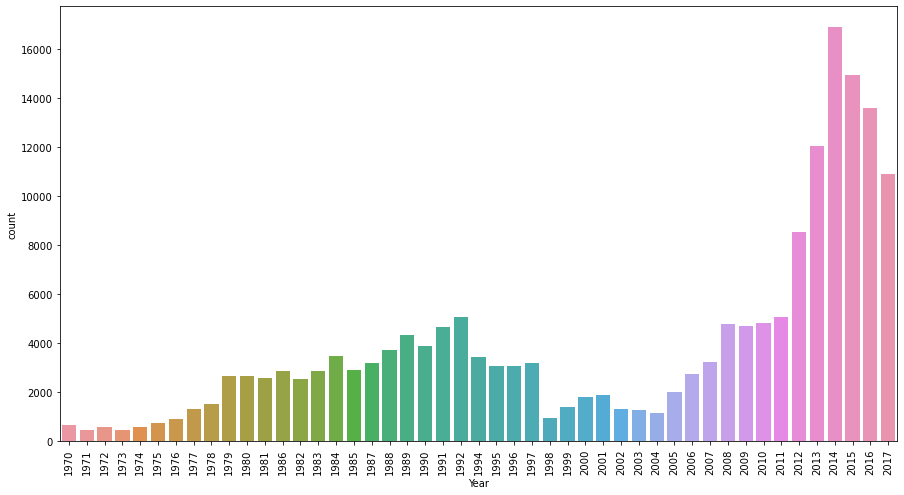

In [91]:
#Year wise terrorist attack
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize=(15,8))
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.show()

Terrorist activites was decreasing after 1992 but it had rapidly increased after 2005 and it was at peak in 2014.

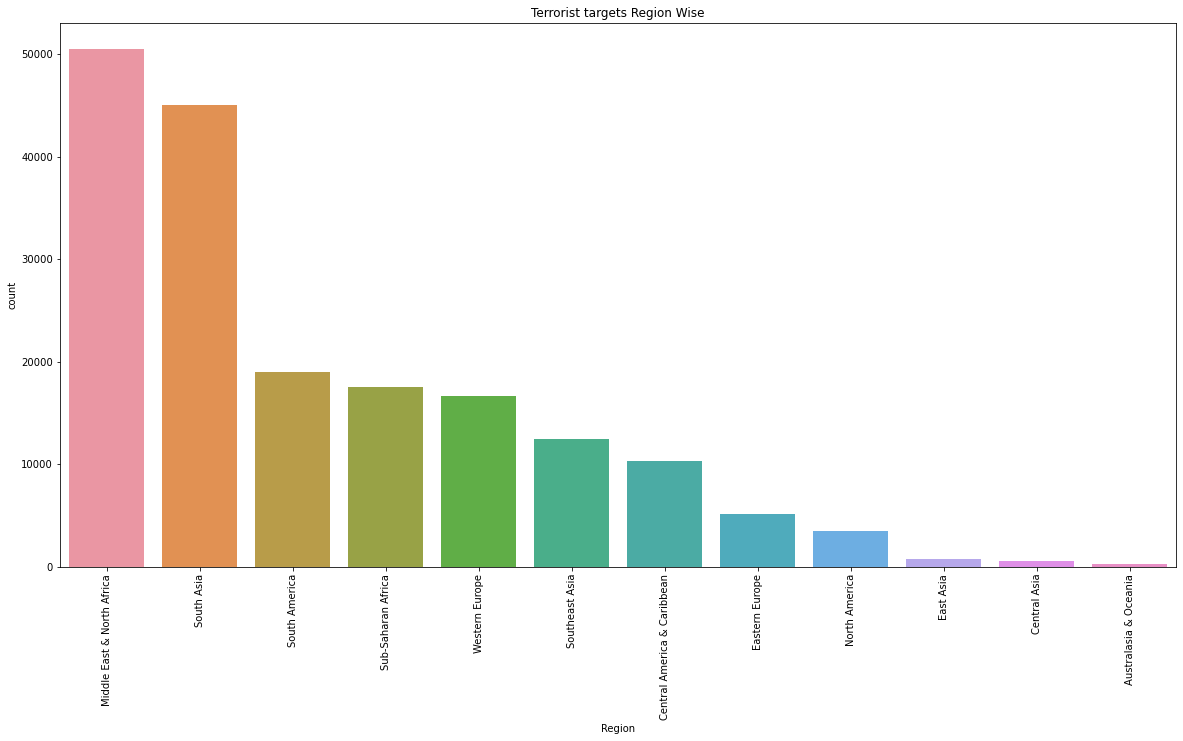

In [92]:
#Terrorist Region Wise
plt.figure(figsize=(20,10))
sns.countplot(x="Region", data=df, order = df["Region"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Terrorist targets Region Wise")
plt.show()

Region of Middle East and North Africa are most affecetd by Terrorism

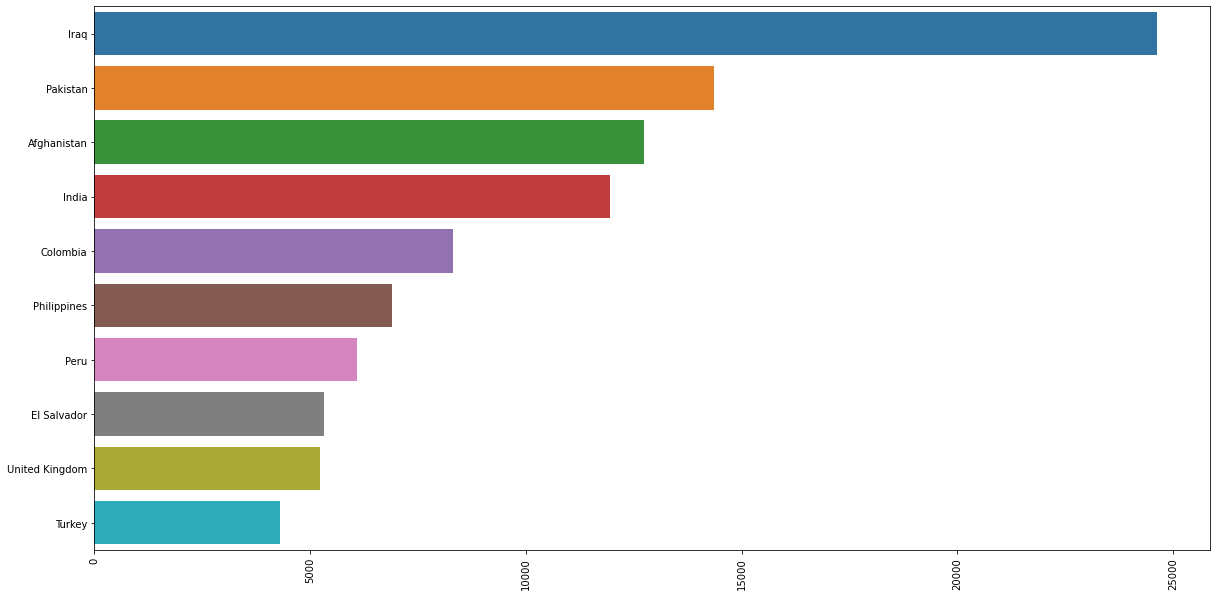

In [104]:
#Analysis of Terrorism cases Countrywise 
plt.figure(figsize=(20,10))
x = df['Country'].value_counts().values[:10]
y = df['Country'].value_counts().index[:10]
sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
plt.show()

From the above barplot it can be concluded that Iraq is the most affected country from terrorism.

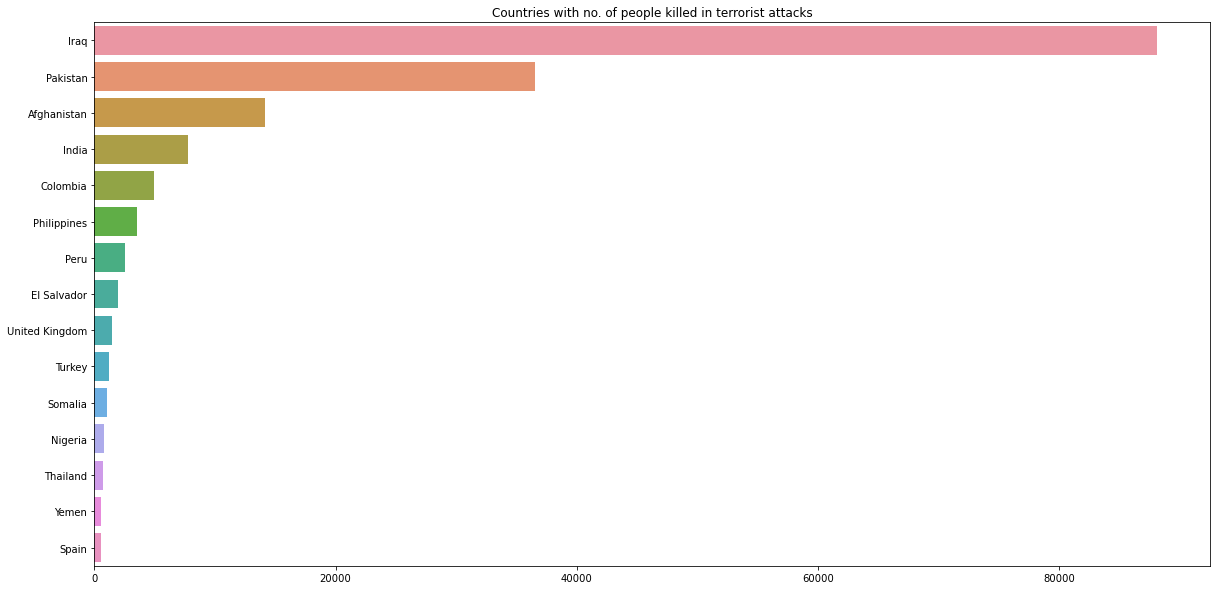

In [102]:
#No. of people got killed country wise
plt.figure(figsize=(20,10))

y=df["Country"].value_counts()[:15].index
x=df["Kill"].value_counts()[:15].values
sns.barplot(x=x, y=y)
plt.title("Countries with no. of people killed in terrorist attacks")
plt.show()

Number of killings is corelated to number of terrorist attacks as increase in later increases the former

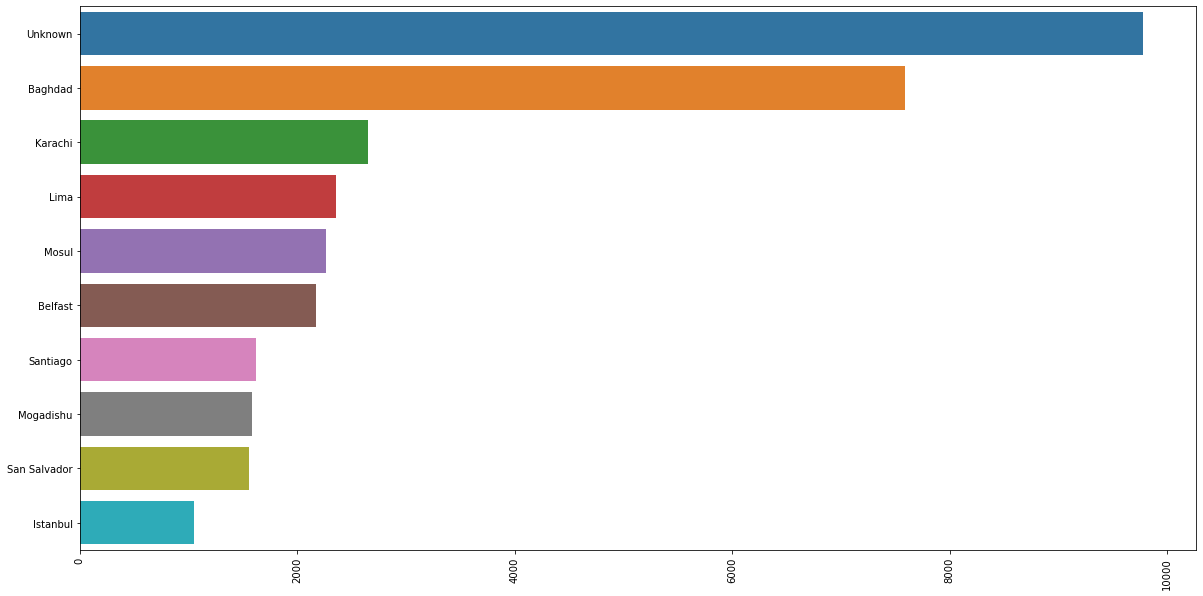

In [103]:
# cities having most terrorist attacks.
plt.figure(figsize=(20,10))
x = df['city'].value_counts().values[:10]
y = df['city'].value_counts().index[:10]
sns.barplot(y=y,x=x)
plt.xticks(rotation=90)
plt.show()

Baghdad has incured most terrorist attack from th eknown data.

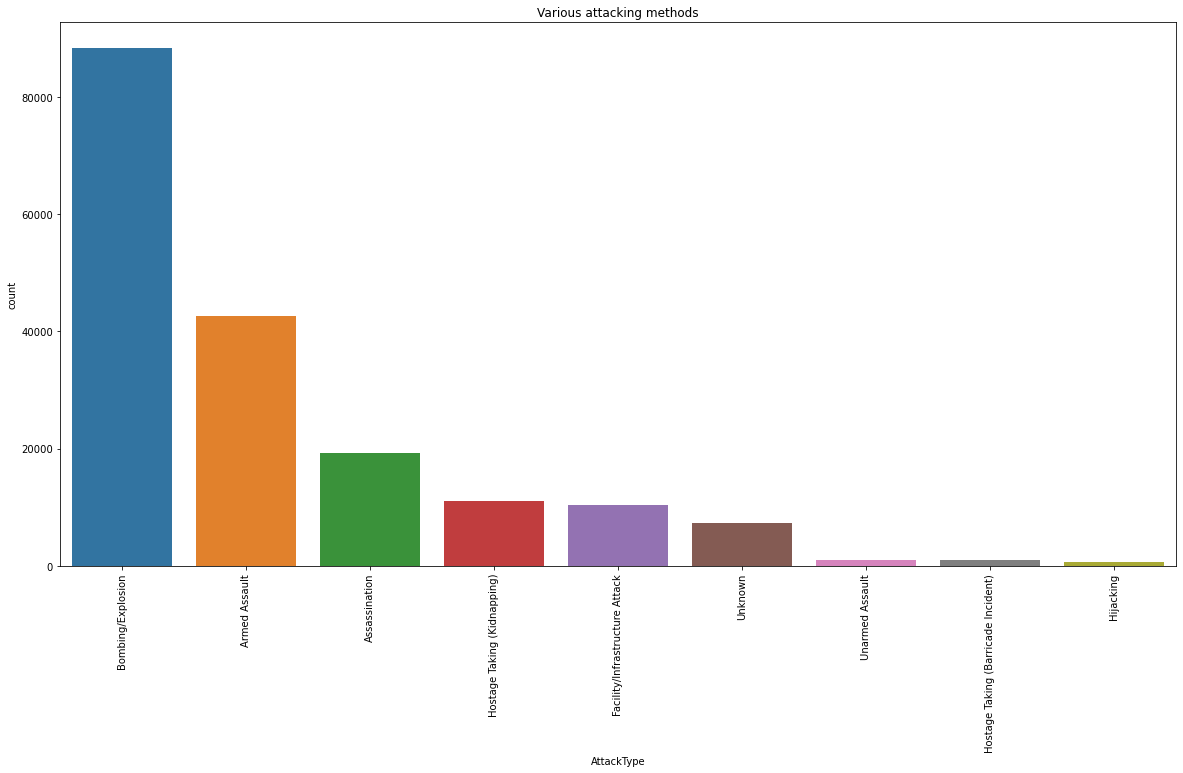

In [98]:
#Different types of terrorist attacks
plt.figure(figsize=(20,10))
sns.countplot(x="AttackType", data=df, order = df["AttackType"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Various attacking methods")
plt.show()

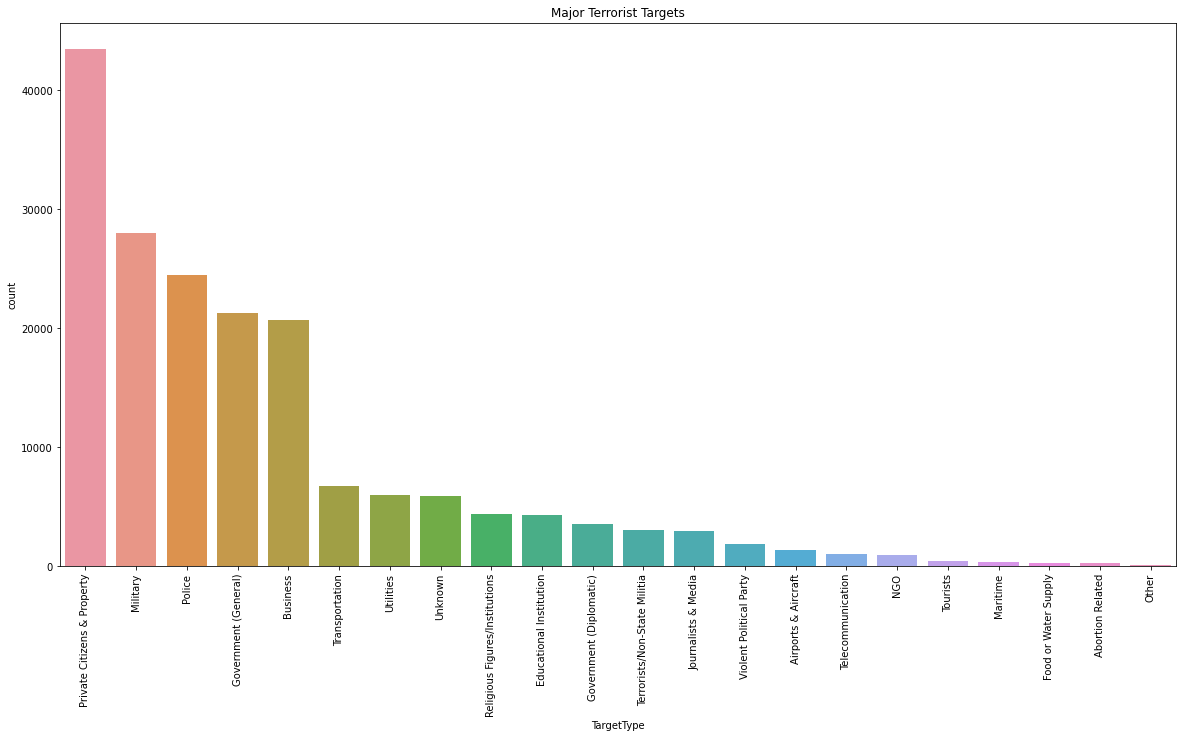

In [99]:
#major terrorist targets
plt.figure(figsize=(20,10))
sns.countplot(x="TargetType", data=df, order = df["TargetType"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Major Terrorist Targets")
plt.show()

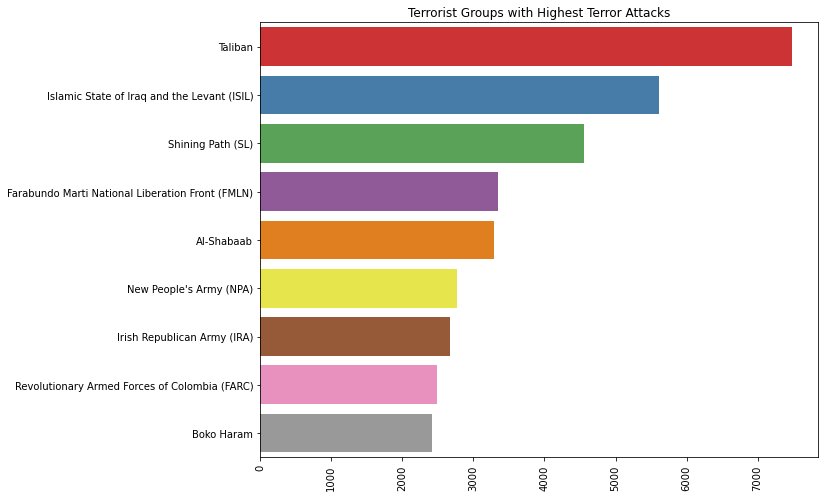

In [108]:
#Most active terrorist groups
sns.barplot(df['Group'].value_counts()[1:10].values,df['Group'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

Taliban has done most number of Terrorist attacks

In [109]:
#Terrorism in India
india = df.groupby('Country').get_group('India')

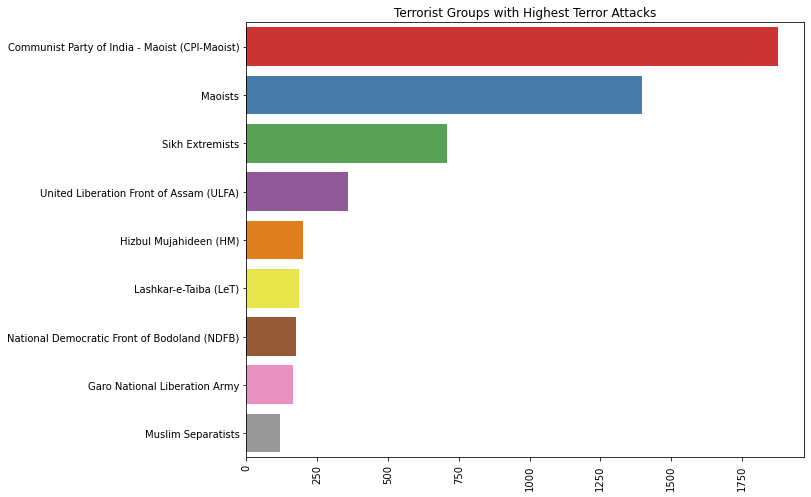

In [110]:
#most active terrorist groups in India
sns.barplot(india['Group'].value_counts()[1:10].values,india['Group'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

CPI-M is highest active terrorist group in India.

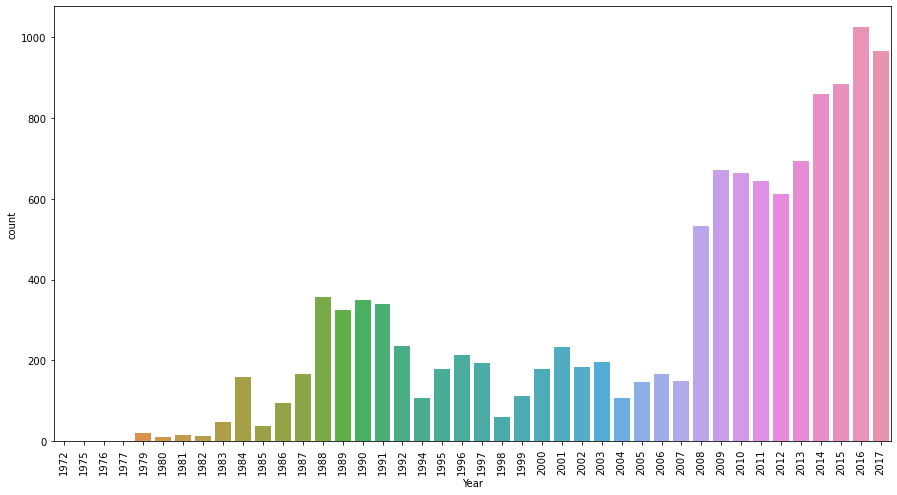

In [111]:
#Terrorist activities year wise in India
plt.figure(figsize=(15,8))
sns.countplot(india['Year'])
plt.xticks(rotation=90)
plt.show()

India witnessed highest number of terrorist attacks in 2016, terrorist activities had increased sharply after 2007.

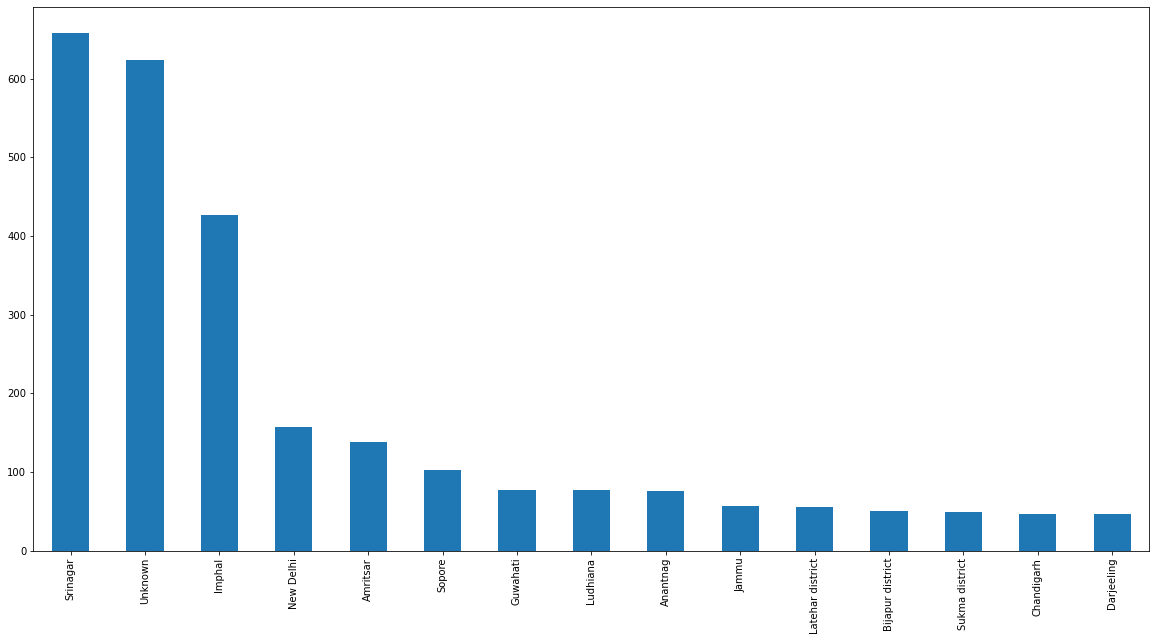

In [113]:
#most affected city
india['city'].value_counts().nlargest(15).plot(kind='bar', figsize=(20,10))
plt.show()

Srinagar has suffred most Terrorist attacks in India

Conclusion
1- Hot zones of terrorism is Middle east and North Arica so, all the countries should focus in these region.

2- Iraq and Afganistan are most suffered country, Government should be aware from the citizens of these countries.

3- Terrorist like to target Private citizens, Army and Police mostly, Security should be tighten in all these areas.

4- Government should tighten borders and should strict arms law.

5- All country should have to make common strategy to to tackle terrorism because after 2005 there is rapid increase in Terrorist Activites.